# Proyecto modulo 1


### 1.1 Título del trabajo.
> Debe describir el trabajo.



### 1.2 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos



### 1.3 Modelo que representa el problema.
> - Se debe incluir la función a optimizar y las restricciones (en caso de que existan).
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).



### 1.4 Solución del problema de optimización.
> - Se debe resolver el problema de optimización.
> - ¿Condujo el algoritmo de optimización a una solución factible?



In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = 'experimentos.csv'
data = pd.read_csv(file_name)
data

,Region,Se extiende desde x(cm)=,Hasta x(cm)=,Region con centro en,Veces que fue encontrado en esta region,Probabilidad de encontrarse en la region
0,1,-2.00,-1.92,-1.96,12,0.006141
1,2,-1.92,-1.84,-1.88,14,0.007165
2,3,-1.84,-1.76,-1.80,16,0.008188
3,4,-1.76,-1.68,-1.72,20,0.010235
4,5,-1.68,-1.60,-1.64,25,0.012794
5,6,-1.60,-1.52,-1.56,27,0.013818
6,7,-1.52,-1.44,-1.48,31,0.015865
7,8,-1.44,-1.36,-1.40,33,0.016888
8,9,-1.36,-1.28,-1.32,39,0.019959
9,10,-1.28,-1.20,-1.24,41,0.020983


In [3]:
x = data.iloc[:,3].values
y = data.iloc[:,5].values
def obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)
bi3=np.zeros(4)
aj3=opt.minimize(obj,bi3,args=(x,y,3))
bi5=np.zeros(6)
aj5=opt.minimize(obj,bi5,args=(x,y,5))
bi8=np.zeros(9)
aj8=opt.minimize(obj,bi8,args=(x,y,8))

In [4]:
b3=aj3.x
yh3=b3.dot([x**i for i in range(4)])
b5=aj5.x
yh5=b5.dot([x**i for i in range(6)])
b8=aj8.x
yh8=b8.dot([x**i for i in range(9)])

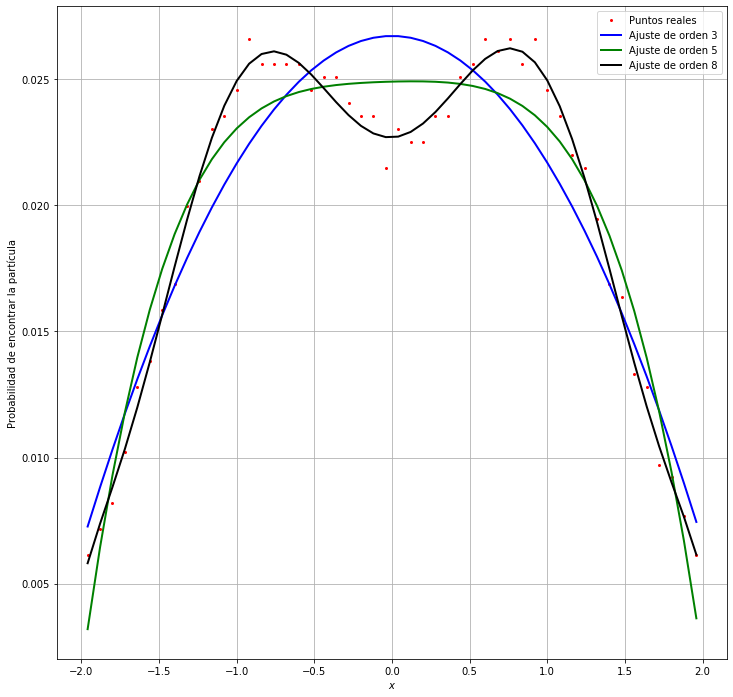

In [5]:
plt.figure(figsize=(12,12))
plt.plot(x,y,'or',ms=2,label='Puntos reales')
plt.plot(x,yh3,'b',linewidth=2,label='Ajuste de orden 3')
plt.plot(x,yh5,'g',linewidth=2,label='Ajuste de orden 5')
plt.plot(x,yh8,'k',linewidth=2,label='Ajuste de orden 8')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('Probabilidad de encontrar la partícula')
plt.legend(loc='best')
plt.show()

### 1.5 Visualización de la solución del problema.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).



### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.



### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.